<a href="https://colab.research.google.com/github/wanghsinche/name-pls.js/blob/notebook/notebook/download_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyGithub

In [ ]:
from github import Github

# First create a Github instance:

# using an access token, get from github oauth
g = Github("xxxxxx")

repo = g.get_repo("wanghsinche/action-practise")
issue = repo.get_issue(1)


In [ ]:
import cv2
import base64
import numpy as np

X = []
y = []

for c in issue.get_comments():
  name, code = c.body.split('\n')
  im_bytes = base64.b64decode(code[29:-1])
  im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # im_arr is one-dim Numpy array
  img = cv2.cvtColor(cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
  if img.shape == (224,224,3) or img.shape == (336,336,3):
    y.append(name)
    X.append(img)
  else :
    print('{} should be removed, because shape is {}, {}'.format(c.html_url,img.shape))
print(len(y))

28


In [ ]:
!pip install deepface --no-deps
!pip install retina-face --no-deps
!pip install gdown mtcnn

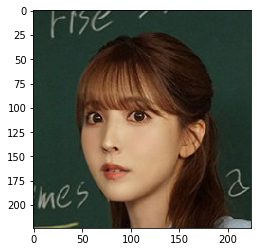

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [ ]:
from deepface import DeepFace
import numpy as np

faces = []
for i in X:
  try:
    face = DeepFace.detectFace(i, detector_backend='ssd')
  except:
    face = np.ones((224,224,3)).astype('float32')

  faces.append(face)


In [ ]:
blobs = cv2.dnn.blobFromImages(faces, 2, (112,112), (0.5,0.5,0.5), False)



In [ ]:
!pip install onnxruntime-gpu onnxruntime

In [ ]:
import onnxruntime as ort
print(ort.get_device())
EP_list = ['CUDAExecutionProvider', 'CPUExecutionProvider']

ss = ort.InferenceSession('/content/drive/MyDrive/Colab Notebooks/insightface/r100-glint300k.onnx', providers=EP_list)
print(ss.get_providers())
for i in ss.get_inputs():
  print(i)

CPU
['CPUExecutionProvider']
NodeArg(name='input.1', type='tensor(float)', shape=['None', 3, 112, 112])


In [ ]:
represent = ss.run(None, {"input.1":blobs})[0]

In [ ]:
data = {
    'feat': represent,
    'target': y 
}
print(len(blobs))
print(len(data['feat']))
print(len(data['target']))

28
28
28


In [ ]:
import pickle
f = open('/content/drive/MyDrive/Colab Notebooks/insightface/github-represent.pkl','wb')
pickle.dump(data, f)
f.close()